# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Type your code here
path = "/content/drive/MyDrive/Colab Notebooks/clustered_data.csv"

# Baca file CSV dari URL
data = pd.read_csv(path)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,Income,MntMeatProducts,cluster
0,58138.0,546.0,1
1,46344.0,6.0,1
2,71613.0,127.0,2
3,26646.0,20.0,3
4,58293.0,118.0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
#Type your code here
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['cluster'])
y = data['cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1792, 2), y_train=(1792,)
Test set shape: X_test=(448, 2), y_test=(448,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
#Type your code here
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # For multi-class, confusion_matrix will return a square matrix of shape (n_classes, n_classes)
    cm = confusion_matrix(y_test, y_pred)

    # Metrics for multi-class classification (use average='weighted' to account for imbalanced classes)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.997768,0.997783,0.997768,0.997768
1,Decision Tree (DT),1.000000,1.000000,1.000000,1.000000
2,Random Forest (RF),1.000000,1.000000,1.000000,1.000000
3,Support Vector Machine (SVM),0.993304,0.993436,0.993304,0.993307
4,Naive Bayes (NB),0.908482,0.909222,0.908482,0.907955


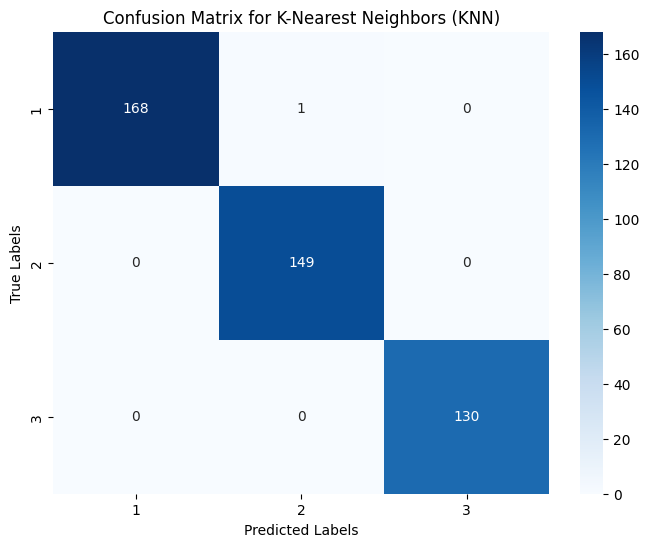

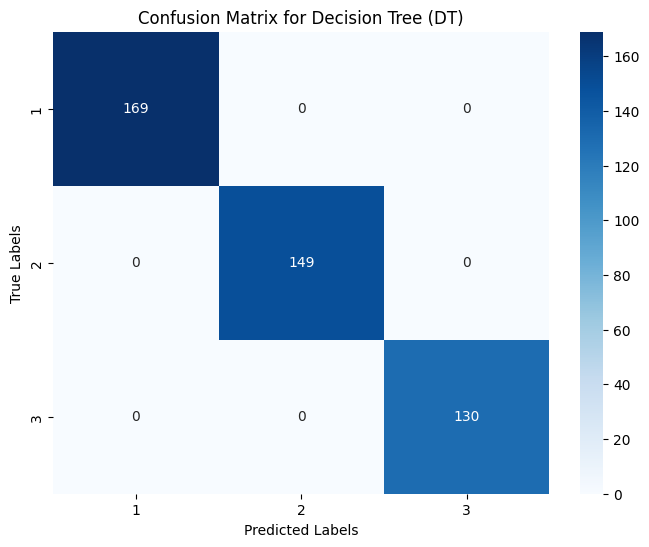

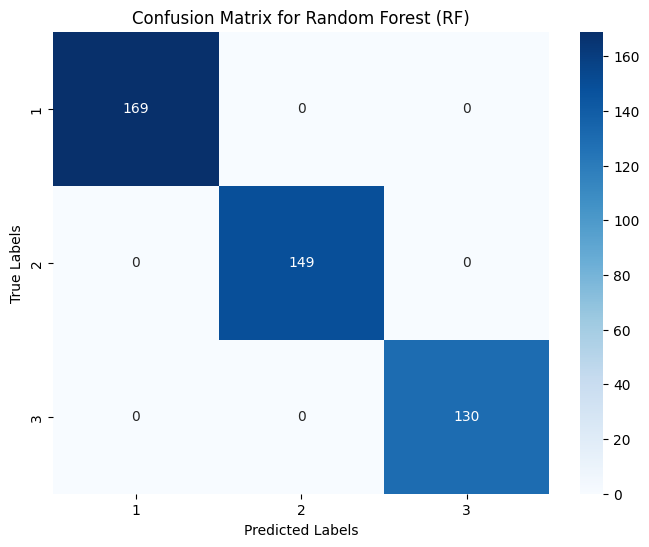

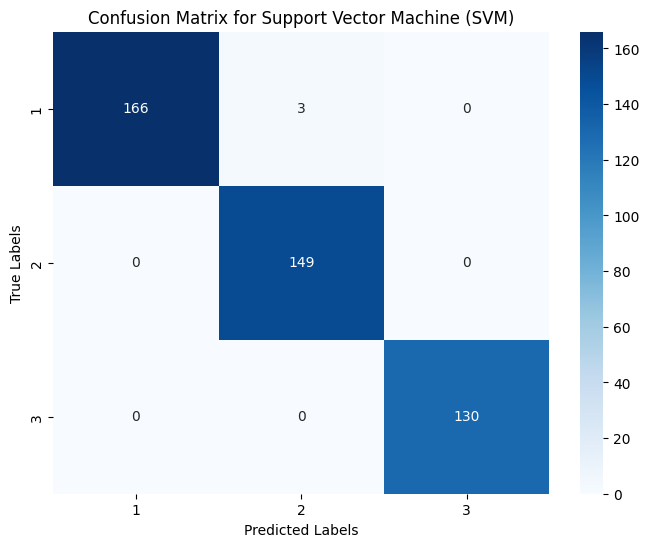

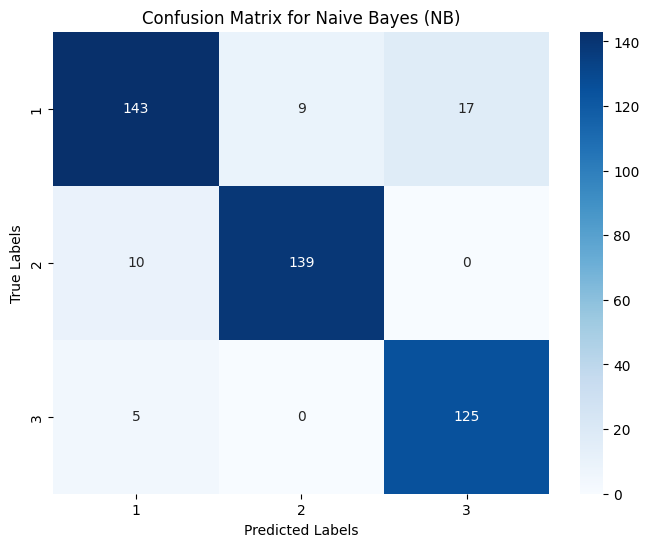

In [14]:
# List of models and their names
models = [knn, dt, rf, svm, nb]
models_name = ['K-Nearest Neighbors (KNN)', 'Decision Tree (DT)', 'Random Forest (RF)', 'Support Vector Machine (SVM)', 'Naive Bayes (NB)']

# Loop over each model
for i, model in enumerate(models):
    # Make predictions with the current model
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_)

    # Set the title and labels
    plt.title(f'Confusion Matrix for {models_name[i]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Show the plot
    plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Overfitting atau Underfitting

- Overfitting: Model seperti Random Forest (RF), Decision Tree (DT), dan K-Nearest Neighbors (KNN) menunjukkan skor yang sangat tinggi pada semua metrik (Accuracy, Precision, Recall, dan F1-Score). Meskipun skor yang tinggi ini bisa menunjukkan bahwa model sangat akurat, ada kemungkinan model tersebut overfitting, terutama jika model sangat cocok dengan data pelatihan tetapi tidak diuji lebih lanjut dengan data lain yang lebih beragam.
Hal ini bisa diperiksa dengan melakukan validasi silang atau dengan mengukur kinerja model pada dataset lain yang tidak terlihat selama pelatihan.

- Underfitting: Sejauh ini tidak ada model yang terlihat underfitting. Hasil evaluasi dari model Naive Bayes dan SVM menunjukan hasil yang tidak sempurna 100%, hal ini baik karena hasil evaluasi model tidaklah boleh benar-benar 100% agar model tidak termasuk indikasi Overfitting

2. Rekomendasi lanjutan:

- Validasi Silang (Cross-Validation):
meLakukan validasi silang (cross-validation) untuk memeriksa kinerja model lebih lanjut pada data yang tidak terlihat. Ini akan memberikan gambaran yang lebih jelas apakah model benar-benar overfitting atau tidak.

- Model Ensembling:
Cobalah menggunakan teknik ensembling seperti Bagging atau Boosting untuk meningkatkan kinerja model. Algoritma seperti Gradient Boosting atau XGBoost mungkin memberikan hasil yang lebih baik, terutama jika dataset sangat besar atau kompleks.

- Feature Engineering:
Lakukan analisis fitur lebih lanjut, misalnya dengan menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi data atau menggunakan teknik lain untuk mengekstrak fitur yang lebih relevan. Hal ini bisa membantu model dalam menangkap pola yang lebih baik.